In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob

In [16]:
path = 'data/*.csv'

frames = []
for fname in glob.glob(path):
    frame = pd.read_csv(fname)
    frames.append(frame)

all_data = pd.concat(frames)


/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_46829/3652592958.py:5: DtypeWarning: Columns (34,36,38,42,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  frame = pd.read_csv(fname)


In [17]:
all_data.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2012,0000451965,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,553703,7309.0,7.02,82500.0,106.919998,2388.0,2433.0,0
1,2012,0000517900,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,6543,2322.0,5.38,68700.0,118.769997,763.0,934.0,0
2,2012,0000606046,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,3814,5622.0,14.96,50200.0,132.580002,1769.0,1994.0,0
3,2012,0000504713,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,20433,3782.0,8.91,88800.0,96.820000,776.0,1419.0,2
4,2012,0000451965,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,2531171,2819.0,21.99,53600.0,88.230003,816.0,1416.0,0


In [18]:
print(all_data.columns)

Index(['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'applicant_race_name_2',
       'applicant_race_2', 'applicant_race_name_3', 'applicant_race_3',
       'applicant_race_name_4', 'applicant_race_4', 'applicant_race_name_5',
       'applicant_race_5', 'co_applicant_race_name_1', 'co_applicant_race_1',
       'co_applicant_race_name_2', 'co_applicant_race_2',
       'co_applicant_race_name_

In [19]:
def map_loan_approval(action):
    if action == 1:
        return 1
    elif action in [2, 4, 5]:
        return 2
    elif action == 3:
        return 0
    else:
        return None  # All values that are dealing w/ preapproval and other inconclusive outcomes go here

all_data['loan_approval'] = all_data['action_taken'].apply(map_loan_approval)

In [20]:
all_data['action_taken_name'].value_counts()

action_taken_name
Loan originated                                        9783966
Loan purchased by the institution                      3167577
Application denied by financial institution            2761964
Application withdrawn by applicant                     1529647
Application approved but not accepted                   710706
File closed for incompleteness                          524369
Preapproval request denied by financial institution     148733
Preapproval request approved but not accepted            64589
Name: count, dtype: int64

In [29]:
all_data['applicant_ethnicity_name'].value_counts()

applicant_ethnicity_name
Not Hispanic or Latino                                                               14045633
Information not provided by applicant in mail, Internet, or telephone application     1945059
Not applicable                                                                        1472698
Hispanic or Latino                                                                    1228161
Name: count, dtype: int64

In [30]:
all_data['applicant_race_name_1'].value_counts()

applicant_race_name_1
White                                                                                13222666
Information not provided by applicant in mail, Internet, or telephone application     1979446
Not applicable                                                                        1469894
Asian                                                                                  963912
Black or African American                                                              898470
American Indian or Alaska Native                                                        93421
Native Hawaiian or Other Pacific Islander                                               63742
Name: count, dtype: int64

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_46829/1906111754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


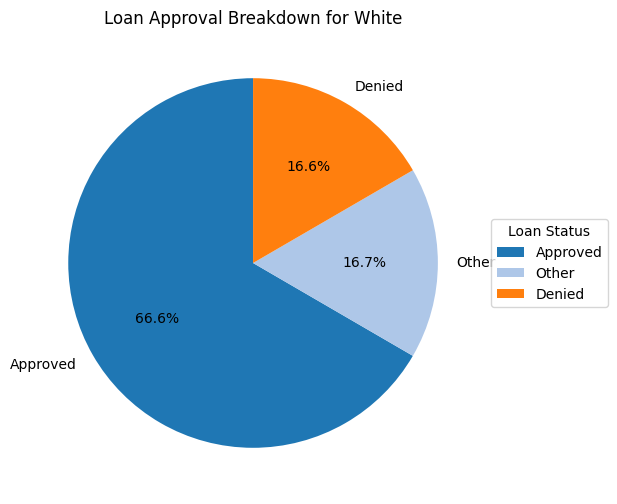

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_46829/1906111754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


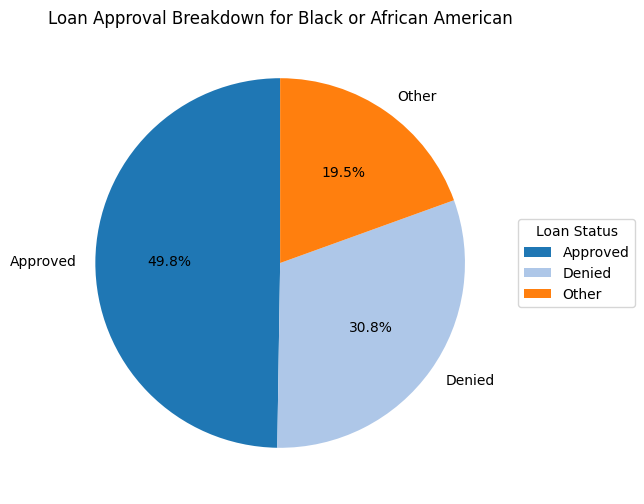

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_46829/1906111754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


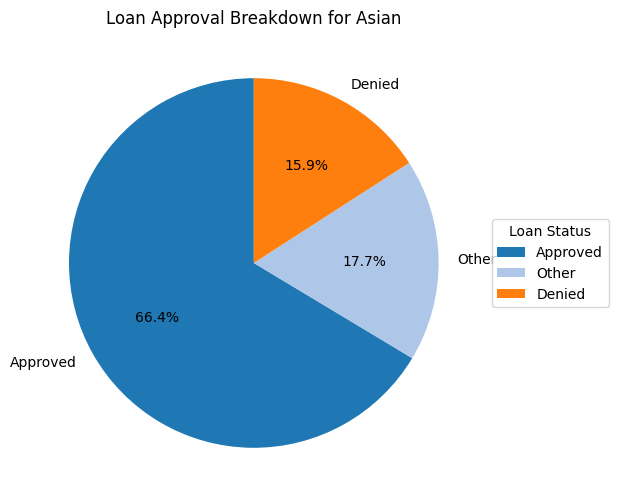

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_46829/1906111754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


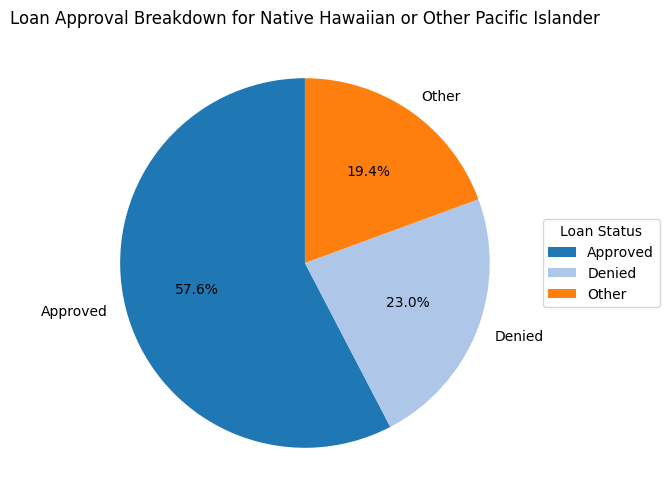

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_46829/1906111754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


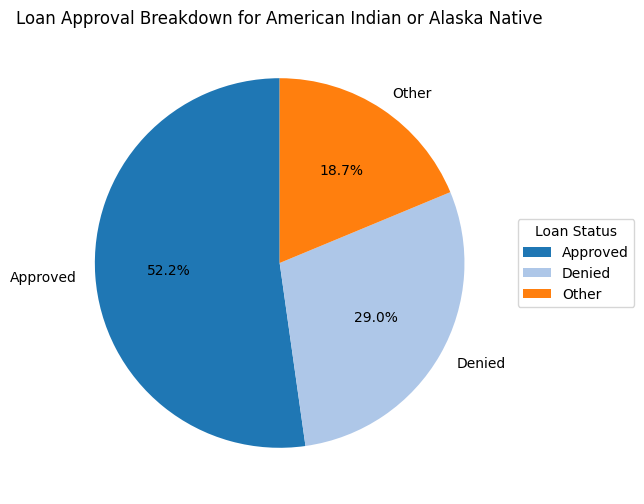

In [ ]:
# Breakdown by Race
approval_labels = {0: 'Denied', 1: 'Approved', 2: 'Other'}
for race in all_data['applicant_race_name_1'].unique():
    if race in ['Information not provided by applicant in mail, Internet, or telephone application', 'Not applicable']: 
        continue
    race_data = all_data[all_data['applicant_race_name_1'] == race]
    race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)
    approval_counts = race_data['loan_approval_label'].value_counts(normalize=True) * 100
    plt.figure(figsize=(6, 6))
    wedges, texts, autotexts = plt.pie(
        approval_counts, 
        labels=approval_counts.index,  # Use the mapped labels for display
        autopct='%1.1f%%', 
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(f"Loan Approval Breakdown for {race}")
    plt.legend(wedges, approval_counts.index, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()


/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_46829/3852779215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_data['loan_approval_label'] = eth_data['loan_approval'].map(approval_labels)


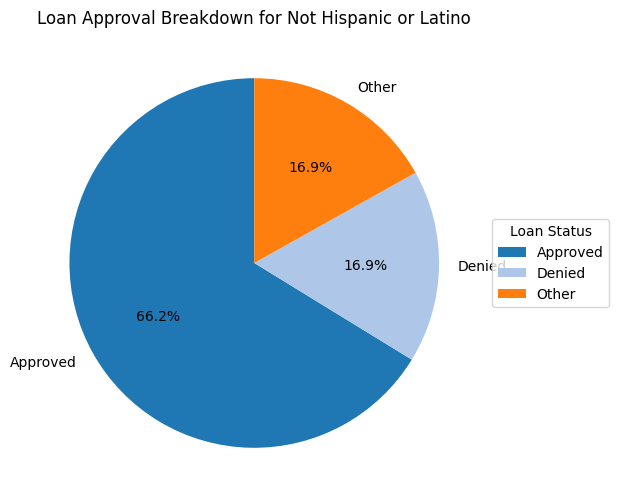

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_46829/3852779215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_data['loan_approval_label'] = eth_data['loan_approval'].map(approval_labels)


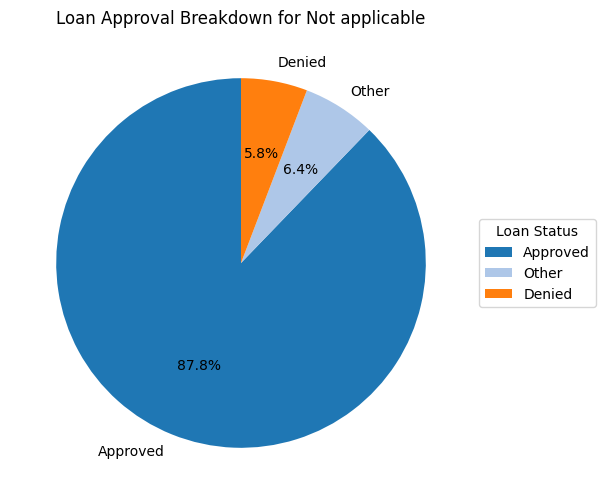

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_46829/3852779215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_data['loan_approval_label'] = eth_data['loan_approval'].map(approval_labels)


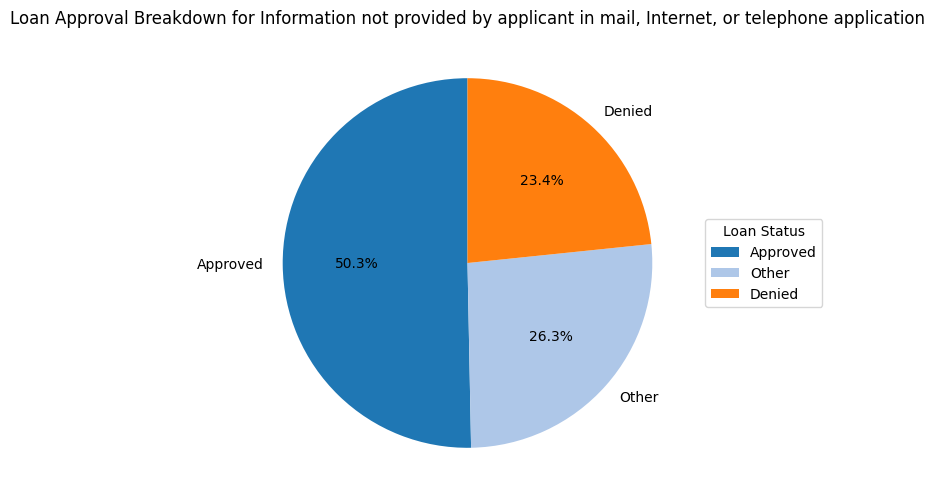

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_46829/3852779215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_data['loan_approval_label'] = eth_data['loan_approval'].map(approval_labels)


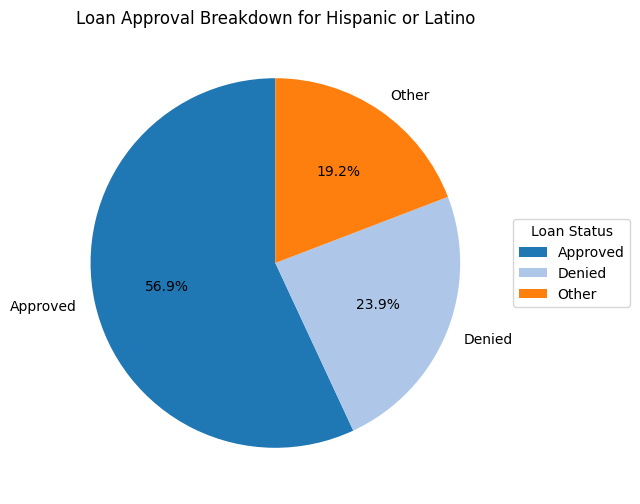

In [28]:
# View for ethnicity
approval_labels = {0: 'Denied', 1: 'Approved', 2: 'Other'}
for eth in all_data['applicant_ethnicity_name'].unique():
    eth_data = all_data[all_data['applicant_ethnicity_name'] == eth]
    eth_data['loan_approval_label'] = eth_data['loan_approval'].map(approval_labels)
    approval_counts = eth_data['loan_approval_label'].value_counts(normalize=True) * 100
    plt.figure(figsize=(6, 6))
    wedges, texts, autotexts = plt.pie(
        approval_counts, 
        labels=approval_counts.index,  # Use the mapped labels for display
        autopct='%1.1f%%', 
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(f"Loan Approval Breakdown for {eth}")
    plt.legend(wedges, approval_counts.index, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()